In [1]:
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge, RidgeCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train= pd.read_csv(r"C:\Users\edwin\OneDrive\Documents\Github\Build Week Project #2\Data\housing data\Build Week train.csv")
test = pd.read_csv(r"C:\Users\edwin\OneDrive\Documents\Github\Build Week Project #2\Data\housing data\Build Week train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


# This is a Regression Problem.

# I. Wrangling Data

In [4]:
# Creating a simple function that rounds up the SQFT and removes the high-cardinality column ('ADDRESS')
def wrangle(df):
    cols = ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE']
    df[cols[5]] = df[cols[5]].apply(np.ceil)
    
    df.drop(columns=cols[8], inplace=True)
    
    return df

In [5]:
wrangle(train)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1301.0,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.0,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,934.0,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,930.0,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,1000.0,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.0,1,1,27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,770.0,1,1,39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1023.0,1,1,26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,928.0,1,1,12.900150,80.227910,67.0


In [6]:
wrangle(test)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1301.0,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.0,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,934.0,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,930.0,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,1000.0,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.0,1,1,27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,770.0,1,1,39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1023.0,1,1,26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,928.0,1,1,12.900150,80.227910,67.0


# II. Splitting Data into Feature Matrix & Target vector

In [7]:
target = 'TARGET(PRICE_IN_LACS)'
y = train[target]
X = train.drop(columns=target)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

assert len(X_train) + len(X_val) == len(X)

# III. Establishing a Baseline 

In [8]:
y_pred = [y_train.mean()] * len(y_train)
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))

Baseline MAE: 141.16040063573556


# IV. Building a Ridge Regresion Model with built-in Cross Validation

In [66]:
model_rcv = make_pipeline(
OneHotEncoder(use_cat_names=True),
StandardScaler(),
RidgeCV(alphas=(0.9, 20.0, 80.0),
        cv=5)
)

model_rcv.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['POSTED_BY', 'BHK_OR_RK'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('ridgecv', RidgeCV(alphas=array([ 0.9, 20. , 80. ]), cv=5))])

## Checking Metrics

In [67]:
print('Training MAE:', mean_absolute_error(y_train, model_rcv.predict(X_train)))
print('Validation MAE:', mean_absolute_error(y_val, model_rcv.predict(X_val)))
print('Training R^2:', model_rcv.score(X_train, y_train))
print('Validation R^2:', model_rcv.score(X_val, y_val))

Training MAE: 139.46357831863523
Validation MAE: 131.20339022238932
Training R^2: 0.16478743049549138
Validation R^2: 0.40560774060178184


## Feature Importance for RidgeRegression CV Model

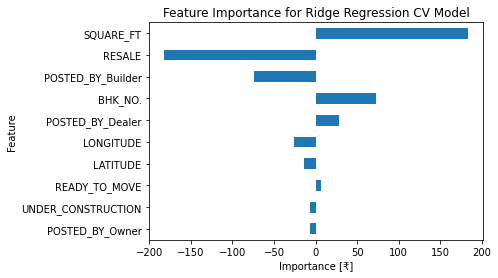

In [11]:
coeffs_ = model_rcv.named_steps['ridgecv'].coef_
feature_names = model_rcv.named_steps['onehotencoder'].get_feature_names()

feature_imp = pd.Series(coeffs_, index=feature_names)
feature_imp.sort_values(ascending=True, key=lambda x: abs(x), inplace=True)
feature_imp.tail(10).plot(kind='barh')
plt.xlabel('Importance [₹]')
plt.ylabel('Feature')
plt.title('Feature Importance for Ridge Regression CV Model')
plt.show()

# V. Building Random Forest Model

In [12]:
model_rf = make_pipeline(
OrdinalEncoder(),
StandardScaler(),
RandomForestRegressor(n_estimators=200,
                      max_depth=30,
                      max_features='sqrt',
                      criterion='mae',
                      bootstrap=True,
                      n_jobs=-1,
                      random_state=42,
                      max_samples=0.8)
)

model_rf.fit(X_train, y_train);

## Checking Metrics

In [13]:
print('Training MAE:', mean_absolute_error(y_train, model_rf.predict(X_train)))
print('Test MAE:', mean_absolute_error(y_val, model_rf.predict(X_val)))
print('Training accuracy score:', model_rf.score(X_train, y_train))
print('Validation accuracy score:', model_rf.score(X_val, y_val))

Training MAE: 16.803741040959252
Test MAE: 40.50350255898829
Training accuracy score: 0.9739059076993494
Validation accuracy score: 0.7100640610669738


## Permutation Importance

In [14]:
perm_imp = permutation_importance(model_rf,
                                  X_val,
                                  y_val,
                                  n_jobs=-1,
                                  random_state=42
                                 )

data = {'importances_mean': perm_imp['importances_mean'],
       'importances_std': perm_imp['importances_mean']}

df = pd.DataFrame(data, index=X_val.columns)
df.sort_values(by='importances_mean', inplace=True)

df['importances_mean'].tail(10).plot(kind='barh')
plt.xlabel('Importances (drop in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation Importance for RandomForestRegressor model')
plt.show()

# VI. Building GradientBoosterRegressor Model

In [53]:
model_gbr = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    GradientBoostingRegressor(loss='huber',
                         n_estimators=200,
                         max_features='auto',
                         random_state=42)
)

model_gbr.fit(X_train, y_train);

## Checking Metrics

In [19]:
print('Training MAE:', mean_absolute_error(y_train, model_gbr.predict(X_train)))
print('Validation MAE:', mean_absolute_error(y_val, model_gbr.predict(X_val)))
print('Training accuracy score:', model_gbr.score(X_train, y_train))
print('Validation accuracy score:', model_gbr.score(X_val, y_val))

Training MAE: 34.236995465123485
Validation MAE: 40.96880270909225
Training accuracy score: 0.9448971261521204
Validation accuracy score: 0.8398140417093396


## Permutation Importance

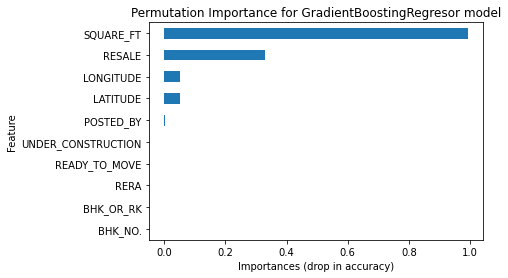

In [68]:
perm_imp2 = permutation_importance(model_gbr,
                                  X_val,
                                  y_val,
                                  n_jobs=-1,
                                  random_state=42
                                 )

data2 = {'importances_mean': perm_imp2['importances_mean'],
       'importances_std': perm_imp2['importances_mean']}

df2 = pd.DataFrame(data2, index=X_val.columns)
df2.sort_values(by='importances_mean', inplace=True)

df2['importances_mean'].tail(10).plot(kind='barh')
plt.xlabel('Importances (drop in accuracy)')
plt.ylabel('Feature')
plt.title('Permutation Importance for GradientBoostingRegresor model')
plt.show()

## Partial Dependence Plot (PDP Plot)
### One Feature

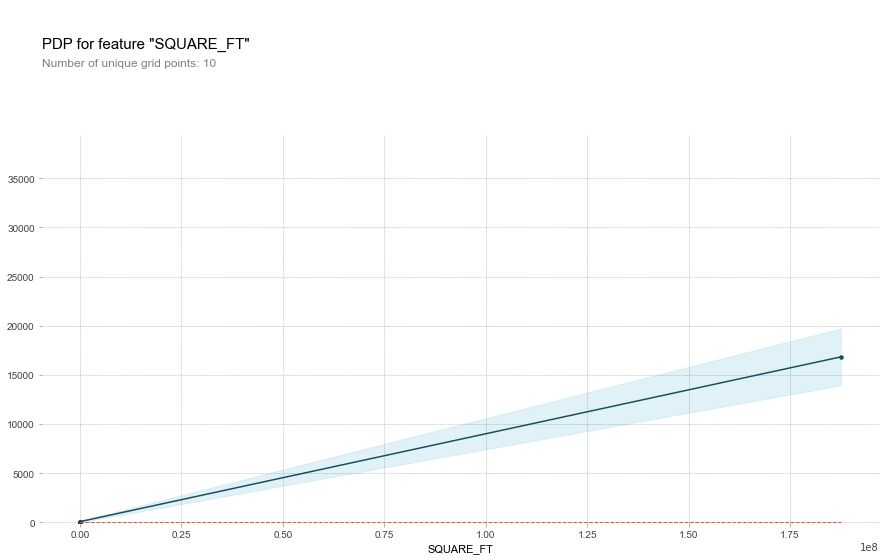

In [28]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'SQUARE_FT'

# Isolate
isolate = pdp_isolate(
    model=model_gbr,
    dataset=X_val, # <-- Always use validation or test data
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(isolate, feature_name=feature);

### Two Features

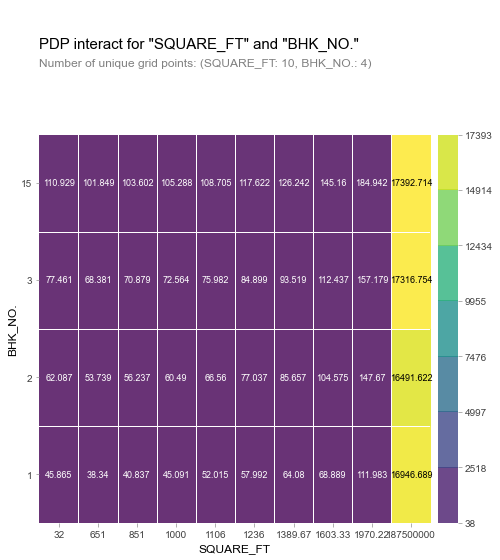

In [50]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['SQUARE_FT', 'BHK_NO.']

interact = pdp_interact(
    model= model_gbr,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interact, plot_type='grid', feature_names=features);

## Shapley
### Visualizing *individual* predictions

In [69]:
# Instanciating Ordinal Encoder
oe = OrdinalEncoder()

# fitting and tranforming 
XT_train= oe.fit_transform(X_train)

# Choosing individual observation
row = XT_train.iloc[[99]]

#Building and fitting Model
model2_gbr = GradientBoostingRegressor(loss='huber',
                         n_estimators=200,
                         max_features='auto',
                         random_state=42)
model2_gbr.fit(XT_train, y_train);

#predicting single observation
model2_gbr.predict(row)

array([26.39660182])

In [45]:
import shap

explainer = shap.TreeExplainer(model2_gbr) # <-- Does not like pipelines
shap_values = explainer.shap_values(row)

shap.initjs()

shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=explainer.shap_values(row),
    features=row
)

# VII. Building XGBoost Regressor Model

In [24]:
eval_set = [(X_val, y_val)]

model_xgb = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    XGBRegressor(n_estimators=60,
                  max_depth=10,
                 min_child_weight=9,
                 gamma=12,
                  learning_rate=0.5,
                  objective='reg:squarederror',
                 tree_method='hist',
                  random_state=42, 
                  eval_set=eval_set,
                  eval_metric='rmse',
                  early_stopping_rounds=10,
                  verbose=True,
                  n_jobs=-1)
)

model_xgb.fit(X_train, y_train);

[19:09:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds, eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [25]:
print('Training MAE:', mean_absolute_error(y_train, model_xgb.predict(X_train)))
print('Validation MAE:', mean_absolute_error(y_val, model_xgb.predict(X_val)))
print('Training accuracy score:', model_xgb.score(X_train, y_train))
print('Validation accuracy score:', model_xgb.score(X_val, y_val))

Training MAE: 23.62290812023164
Validation MAE: 44.668379602369114
Training accuracy score: 0.9910637129907442
Validation accuracy score: 0.7464669550507044


# VIII. Creating a Mock Submission with GradientBooster model's predictions.

In [85]:
#Ordinally encoding the test data provided
t_test = oe.fit_transform(test)

#Removing the actual prices of the test data set provided
actual_prices= t_test[target]
t_test.drop(columns=target, inplace=True)
#Making the predictions
predictions = model_gbr.predict(t_test)


#Creating a DataFrame to show how my model performed and what were the actual prices.
data3 = {"My Model's Predictions": predictions,
       'Actual Prices': actual_prices}
test_df = pd.DataFrame(data3, index=t_test.index)

#Rounding up my predictions
test_df["My Model's Predictions"] = test_df["My Model's Predictions"].apply(np.ceil)

In [86]:
display(test_df)

,My Model's Predictions,Actual Prices
0,82.0,55.0
1,65.0,51.0
2,49.0,43.0
3,51.0,62.5
4,42.0,60.5
...,...,...
29446,133.0,45.0
29447,62.0,16.0
29448,42.0,27.1
29449,51.0,67.0


## Not very accurate, but with more practice I know that I can build more accurate models.